In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import yellowbrick
from yellowbrick.datasets import load_bikeshare
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
from pandas import read_csv
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |


# Exercises 2
    In the context of this problem, what is a false positive?
    In the context of this problem, what is a false negative?
    How would you describe this model?

In [9]:
# Calling DataFrame constructor  
data = {'actual':['dog','cat'], 'prediction_dog':[46,13], 'prediction_cat':[7,34]}
df = pd.DataFrame(data)
df

,actual,prediction_dog,prediction_cat
0,dog,46,7
1,cat,13,34


false neg: cat was predicted but it was actually dog

False neg: dog predicted but it was acturally cat 

It a ML predictor regarding image id for cats. 

In [12]:
TP = 34
TN = 46
FP = 7
FN = 13

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.8

In [13]:
precision = TP / (TP + FN)
precision

0.723404255319149

In [14]:
recall = TP / (TP + FN)
recall

0.723404255319149

# Exercise 3 You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant. 

In [187]:
filename = r'/Users/christophercurran/codeup-data-science/classification-exercises/c3.csv'

df = pd.read_csv(filename)
df

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect
...,...,...,...,...
195,No Defect,No Defect,Defect,Defect
196,Defect,Defect,No Defect,No Defect
197,No Defect,No Defect,No Defect,No Defect
198,No Defect,No Defect,Defect,Defect


In [188]:
df.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

In [189]:
subset = df[df.actual == 'Defect']
subset



,actual,model1,model2,model3
13,Defect,No Defect,Defect,Defect
30,Defect,Defect,No Defect,Defect
65,Defect,Defect,Defect,Defect
70,Defect,Defect,Defect,Defect
74,Defect,No Defect,No Defect,Defect
87,Defect,No Defect,Defect,Defect
118,Defect,No Defect,Defect,No Defect
135,Defect,Defect,No Defect,Defect
140,Defect,No Defect,Defect,Defect
147,Defect,Defect,No Defect,Defect


# Exercises 3a
# Which evaluation metric would be appropriate here? 

# Which model would be the best fit for this use case?

QC wants to identify defects so we will be using a positive class identifier

The best metric would be recall metric

In [190]:
recall = (subset.actual == subset.model1).mean()
print('mod 1')
print(f"recall: {recall:.2%}")

mod 1
recall: 50.00%


In [191]:
recall = (subset.actual == subset.model2).mean()
print('mod 2')
print(f"recall: {recall:.2%}")

mod 2
recall: 56.25%


In [192]:
recall = (subset.actual == subset.model3).mean()
print('mod 3')
print(f"recall: {recall:.2%}")

mod 3
recall: 81.25%


# 3a answers
the best model they should use is model 3 

# Exercises 3b
Which evaluation metric would be appropriate here? 

Which model would be the best fit for this use case?

I would us the precision metric

In [193]:
subset = df[df.model1 == 'Defect']
precision = (subset.actual == subset.model1).mean()
print('model 1')
print(f"precision: {precision:.2%}")

model 1
precision: 80.00%


In [161]:
subset = df[df.model2 == 'Defect']
precision = (subset.actual == subset.model2).mean()
print('model 2')
print(f"precision: {precision:.2%}")

model 2
precision: 10.00%


In [162]:
subset = df[df.model3 == 'Defect']
precision = (subset.actual == subset.model3).mean()
print('model 3')
print(f"precision: {precision:.2%}")

model 3
precision: 13.13%


# answer 3b 
model one has the most precision and is less likely to have a false positive

# excercise 4 

In [3]:
filename = r'/Users/christophercurran/codeup-data-science/classification-exercises/gives_you_paws.csv'
df = pd.read_csv(filename)

In [4]:
df

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog
...,...,...,...,...,...
4995,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog
4997,dog,cat,cat,dog,dog
4998,cat,cat,cat,cat,dog


In [5]:
df.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

# dog is the most frequent label

In [6]:
df['baseline'] = df.actual.value_counts().idxmax()
df.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog


In [7]:
baseline_mean = (df.baseline == df.actual).mean()
print(f'baseline vs actual accuracy: {baseline_mean:.2%}')

baseline vs actual accuracy: 65.08%


In [8]:
recall = (df.model1 == df.actual).mean()
print(f'model one accuracy: {recall:.2%}')

model one accuracy: 80.74%


In [9]:
recall = (df.model2 == df.actual).mean()
print(f'model two accuracy: {recall:.2%}')

model two accuracy: 63.04%


In [170]:
recall = (df.model3 == df.actual).mean()
print(f'model three accuracy: {recall:.2%}')

model three accuracy: 50.96%


In [10]:
recall = (df.model4 == df.actual).mean()
print(f'model four accuracy: {recall:.2%}')

model four accuracy: 74.26%


# ex. 4(a) answer
# model 1 performs the best against the baseline

# ex. 4(b) dog positive
dog = positive 

cat = negative

Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for 

Phase I? For Phase II?

# phase 1 should be recall matric would be the best since its a ML regarding image recognition

In [15]:
subset = df[df.actual == 'dog']
subset.head()

,actual,model1,model2,model3,model4,baseline
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
5,dog,dog,dog,dog,dog,dog
8,dog,dog,cat,dog,dog,dog


In [16]:
subset = df[df.actual == 'dog']
acc_dog = (subset.actual == subset.model1).mean()
print(f'model one accuracy: {acc_dog:.2%}')

model one accuracy: 80.33%


In [206]:
subset = df[df.actual == 'dog']
acc_dog = (subset.actual == subset.model2).mean()
print(f'model two accuracy: {acc_dog:.2%}')

model two accuracy: 40.00%


In [17]:
subset = df[df.actual == 'dog']
acc_dog = (subset.actual == subset.model3).mean()
print(f'model three accuracy: {acc_dog:.2%}')

model three accuracy: 50.86%


In [18]:
subset = df[df.actual == 'dog']
acc_dog = (subset.actual == subset.model4).mean()
print(f'model four accuracy: {acc_dog:.2%}')

model four accuracy: 95.57%


# dog positve phase 1 model four has the highest recall

 # phase 2 should be using precision metic to mitigate false positive

 

In [25]:
df.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog


In [26]:
subset1 = df[df.model1 == 'dog']
subset2 = df[df.model2 == 'dog']
subset3 = df[df.model3 == 'dog']
subset4 = df[df.model4 == 'dog']


In [29]:
subset1.head()

,actual,model1,model2,model3,model4,baseline
1,dog,dog,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
5,dog,dog,dog,dog,dog,dog
7,cat,dog,cat,cat,dog,dog
8,dog,dog,cat,dog,dog,dog


In [31]:
dog_prec = (subset1.actual == subset1.model1).mean()
print('model 1')
print(f"precision {dog_prec:.2%}")

model 1
precision 89.00%


In [33]:
dog_prec = (subset2.actual == subset2.model2).mean()
print('model 2')
print(f"precision {dog_prec:.2%}")

model 2
precision 89.32%


In [37]:
dog_prec = (subset3.actual == subset3.model3).mean()
print('model 3')
print(f"precision {dog_prec:.2%}")

model 3
precision 65.99%


In [38]:
dog_prec = (subset4.actual == subset4.model4).mean()
print('model 4')
print(f"precision {dog_prec:.2%}")

model 4
precision 73.12%


# ex. 4(b) Phase two

The most Precision is model 2 

#  4(c) cat = positive

Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for 

Phase I? For Phase II?

In [40]:
subset = df[df.actual == 'cat']
subset.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog
6,cat,cat,cat,cat,dog,dog
7,cat,dog,cat,cat,dog,dog
11,cat,cat,dog,cat,cat,dog


In [42]:
subset = df[df.actual == 'cat']
acc_cat = (subset.actual == subset.model1).mean()
print(f'model one accuracy: {acc_cat:.2%}')

model one accuracy: 81.50%


In [43]:
subset = df[df.actual == 'cat']
acc_cat = (subset.actual == subset.model2).mean()
print(f'model two accuracy: {acc_cat:.2%}')

model two accuracy: 89.06%


In [44]:
subset = df[df.actual == 'cat']
acc_cat = (subset.actual == subset.model3).mean()
print(f'model three accuracy: {acc_cat:.2%}')

model three accuracy: 51.15%


In [45]:
subset = df[df.actual == 'cat']
acc_cat = (subset.actual == subset.model4).mean()
print(f'model four accuracy: {acc_cat:.2%}')

model four accuracy: 34.54%


# ex.4(c) answers 
Phase one model witht the highest recall is model 2 

# ex.4(c) Phase 2

recommend precision matric since trying midigate false positives

In [48]:
subset1 = df[df.model1 == 'cat']
subset2 = df[df.model2 == 'cat']
subset3 = df[df.model3 == 'cat']
subset4 = df[df.model4 == 'cat']

In [49]:
subset1.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
4,cat,cat,cat,dog,dog,dog
6,cat,cat,cat,cat,dog,dog
9,dog,cat,dog,cat,dog,dog


In [50]:
cat_prec = (subset1.actual == subset1.model1).mean()
print('model 1')
print(f"precision {cat_prec:.2%}")

model 1
precision 68.98%


In [51]:
cat_prec = (subset2.actual == subset2.model2).mean()
print('model 2')
print(f"precision {cat_prec:.2%}")

model 2
precision 48.41%


In [52]:
cat_prec = (subset3.actual == subset3.model3).mean()
print('model 3')
print(f"precision {cat_prec:.2%}")

model 3
precision 35.83%


In [53]:
cat_prec = (subset4.actual == subset4.model4).mean()
print('model 4')
print(f"precision {cat_prec:.2%}")

model 4
precision 80.72%


# ex 4(c) Phase 2 answers

the most percision is model 4 

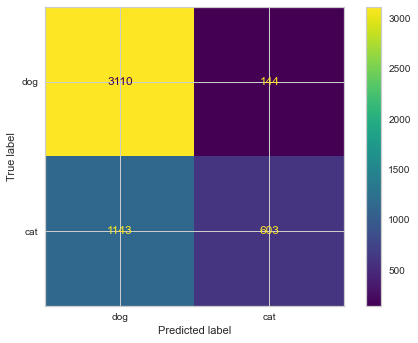

In [55]:
cm = confusion_matrix(df.actual, df.model4, labels = ('dog', 'cat'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=('dog','cat'))
disp.plot()
plt.show()

# the OMG quick way to Ex 4. Everything above 

In [57]:
filename = r'/Users/christophercurran/codeup-data-science/classification-exercises/gives_you_paws.csv'
df = pd.read_csv(filename)

In [65]:
df.head()

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog


In [66]:
# transpose function 
x = classification_report(df.actual, df.model1, output_dict=True)
pd.DataFrame(x).transpose()

,precision,recall,f1-score,support
cat,0.689772,0.815006,0.747178,1746.0000
dog,0.890024,0.803319,0.844452,3254.0000
accuracy,0.807400,0.807400,0.807400,0.8074
macro avg,0.789898,0.809162,0.795815,5000.0000
weighted avg,0.820096,0.807400,0.810484,5000.0000


In [67]:
# using transpose function in classification_report with the '.T' suffix
print("Model 1")
pd.DataFrame(classification_report(df.actual, df.model1,labels = ['cat', 'dog'], output_dict=True)).T

Model 1


,precision,recall,f1-score,support
cat,0.689772,0.815006,0.747178,1746.0000
dog,0.890024,0.803319,0.844452,3254.0000
accuracy,0.807400,0.807400,0.807400,0.8074
macro avg,0.789898,0.809162,0.795815,5000.0000
weighted avg,0.820096,0.807400,0.810484,5000.0000


In [71]:
# using transpose function in classification_report with the '.T' suffix
print("Model 2")
pd.DataFrame(classification_report(df.actual, df.model2,labels = ['cat', 'dog'], output_dict=True)).T

Model 2


,precision,recall,f1-score,support
cat,0.484122,0.890607,0.627269,1746.0000
dog,0.893177,0.490781,0.633479,3254.0000
accuracy,0.630400,0.630400,0.630400,0.6304
macro avg,0.688649,0.690694,0.630374,5000.0000
weighted avg,0.750335,0.630400,0.631310,5000.0000


In [72]:
# using transpose function in classification_report with the '.T' suffix
print("Model 3")
pd.DataFrame(classification_report(df.actual, df.model3,labels = ['cat', 'dog'], output_dict=True)).T

Model 3


,precision,recall,f1-score,support
cat,0.358347,0.511455,0.421425,1746.0000
dog,0.659888,0.508605,0.574453,3254.0000
accuracy,0.509600,0.509600,0.509600,0.5096
macro avg,0.509118,0.510030,0.497939,5000.0000
weighted avg,0.554590,0.509600,0.521016,5000.0000


In [73]:
# using transpose function in classification_report with the '.T' suffix
print("Model 4")
pd.DataFrame(classification_report(df.actual, df.model4,labels = ['cat', 'dog'], output_dict=True)).T

Model 4


,precision,recall,f1-score,support
cat,0.807229,0.345361,0.483755,1746.0000
dog,0.731249,0.955747,0.828560,3254.0000
accuracy,0.742600,0.742600,0.742600,0.7426
macro avg,0.769239,0.650554,0.656157,5000.0000
weighted avg,0.757781,0.742600,0.708154,5000.0000


In [75]:
def calculate_precision(df,predictions, positive):
    return precision_score(df.actual, predictions, pos_label=positive)

In [76]:
def calculate_recall(df,predictions, positive):
    return recall_score(df.actual, predictions, pos_label=positive)

In [ ]:
pd.concat([
    df.loc[:, 'model1':'baseline'].apply(calculate_recall).rename('recall'),
    df.loc[:, 'model1':'baseline'].apply(calculate_precision).rename('precision'),
], axis=1)